In [209]:
from dpks.quant_matrix import QuantMatrix
from sklearn.cluster import KMeans, AgglomerativeClustering, FeatureAgglomeration, HDBSCAN

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import make_classification

In [210]:

# Parameters for the dataset
n_samples = 100
n_features = 100
n_informative = 50
n_redundant = 0
n_repeated = 0
n_noise = n_features - n_informative - n_redundant

# Create a dataset with informative, redundant, and noise features
X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_redundant=n_redundant,
    n_repeated=n_repeated,
    n_classes=2,
    random_state=0,
    n_clusters_per_class=1,
    shuffle=False,
    shift=30,
    scale=1,
    class_sep=2
)


In [211]:
# X_log2 = np.log2(X + 1)
# noise = np.random.normal(0, 0.1, X_log2.shape)
# X_log2_hetero = X_log2 + noise

In [212]:
protein_ids = [f'Protein_{i+1}' for i in range(n_features)]

In [213]:

X = pd.DataFrame(X, columns=protein_ids)

X

,Protein_1,Protein_2,Protein_3,Protein_4,Protein_5,Protein_6,Protein_7,Protein_8,Protein_9,Protein_10,...,Protein_91,Protein_92,Protein_93,Protein_94,Protein_95,Protein_96,Protein_97,Protein_98,Protein_99,Protein_100
0,27.894135,36.903479,31.921460,27.529064,37.570338,30.740377,31.901599,30.639198,28.992918,27.844409,...,30.453531,30.032869,29.640923,30.862242,31.478396,28.823558,32.243016,28.293304,31.682959,30.898251
1,24.504447,29.249429,28.860631,29.649551,33.700410,29.147120,31.453058,29.871010,39.828163,34.285890,...,31.860711,30.135126,30.464527,30.504539,28.964958,30.377551,30.427741,29.004208,28.614628,30.771575
2,23.835444,34.238792,31.309689,38.095657,28.221134,22.767027,33.571928,30.704246,42.206338,32.450145,...,29.142057,31.223116,29.693406,30.661108,30.781896,30.675109,30.389362,27.786260,32.201023,29.282943
3,22.443530,32.215885,28.778724,28.520425,29.842599,36.475799,31.886036,30.813172,34.944943,34.753626,...,30.601879,30.470448,30.732804,29.863544,31.457040,29.158362,28.341350,31.248114,30.727769,28.931565
4,32.659477,34.034045,30.859089,23.621152,28.272812,25.192278,29.947822,29.066877,31.038093,28.875533,...,31.238971,31.069247,30.126823,28.332843,30.563437,29.785432,32.680847,29.286463,30.089252,30.005625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,28.767737,35.146929,27.370998,25.019543,26.672003,29.736039,34.500759,26.237551,24.684229,34.172138,...,28.565612,30.409618,28.377389,30.444885,28.742747,29.197157,30.568060,27.648522,31.832089,29.070782
96,20.789399,23.245345,32.225790,25.329046,22.958673,34.417895,37.012071,29.465104,24.582220,26.175769,...,29.085688,29.973667,28.446595,30.205869,29.416413,29.319458,29.941347,31.640477,29.937835,28.886525
97,24.210723,36.386541,28.595223,30.461258,33.869990,34.419184,32.036650,36.550111,38.154082,21.401449,...,29.999511,28.486941,28.723053,30.319965,29.916725,28.618241,30.237631,28.229367,28.385978,27.359132
98,36.655628,32.452428,39.090683,28.646089,19.163913,38.196420,42.913637,33.523337,33.447221,30.762271,...,29.930580,30.432132,30.764745,28.608980,27.556315,31.761466,29.850037,29.371616,28.626513,30.351043


In [214]:
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
#
# X[:] = scaler.fit_transform(X[:])

In [215]:
from umap import UMAP

pca = UMAP(n_components=2, n_neighbors=5)

pca.fit(X)

components = pca.transform(X)

C:\Users\aaron\anaconda3\envs\dpksenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\aaron\anaconda3\envs\dpksenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [216]:
components = np.concatenate((y.reshape((-1, 1)), components), axis=1)

<Axes: xlabel='PC1', ylabel='PC2'>

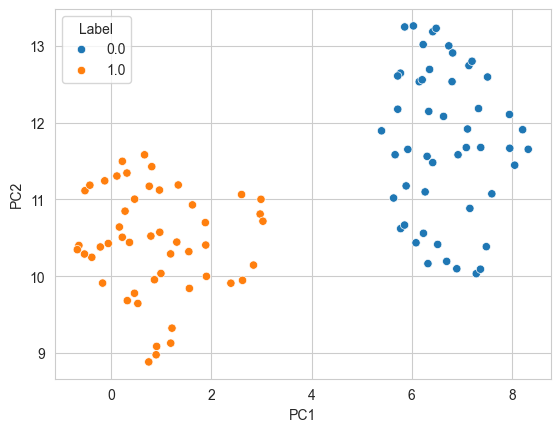

In [217]:
components = pd.DataFrame(components, columns=['Label', 'PC1', 'PC2'])

sns.scatterplot(
    data=components,
    x='PC1',
    y='PC2',
    hue='Label',
)

In [218]:
samples = [f'Sample_{i+1}' for i in range(n_samples)]
# df = pd.DataFrame(X, index=protein_ids, columns=samples)
# df = df.reset_index(names="Protein")

In [219]:
df = X.T.rename(
    columns={
        colidx: sample for colidx, sample in enumerate(samples)
    }
).reset_index(names="Protein")

In [220]:
group_labels = y

In [221]:
design_matrix = pd.DataFrame(
    {
        "sample": samples,
        "group": group_labels,
    }
)

In [222]:
design_matrix.to_csv(
    "../tests/input_files/simulated_design_matrix.tsv",
    sep="\t",
    index=False,
)

In [223]:
df.to_csv(
    "../tests/input_files/simulated_proteins.tsv",
    sep="\t",
    index=False,
)

In [224]:
from dpks.quant_matrix import QuantMatrix

quant_matrix = QuantMatrix(
    quantification_file=df,
    design_matrix_file=design_matrix,
)

In [225]:
quant_matrix = quant_matrix.compare(
    method="anova",
    comparisons=(1, 0),
    min_samples_per_group=2,
    level="protein",
    multiple_testing_correction_method="fdr_tsbh",
    log2_transformed=True
)

In [226]:
da_df = quant_matrix.row_annotations

In [227]:
da_df

,Protein,DEScore1-0,Group1Mean,Group0Mean,Group1Stdev,Group0Stdev,Log2FoldChange1-0,PValue1-0,Group1RepCounts,Group0RepCounts,CorrectedPValue1-0,-Log10CorrectedPValue1-0
0,Protein_1,0.067982,27.511239,27.683412,4.180425,4.498942,-0.172174,0.822564,50,100,0.918273,0.037028
1,Protein_2,0.099525,31.994635,32.240825,4.094675,3.956181,-0.246190,0.724805,50,100,0.918273,0.037028
2,Protein_3,0.179222,32.497636,32.061684,3.992884,4.078405,0.435952,0.537985,50,100,0.918273,0.037028
3,Protein_4,0.088446,28.446636,28.230580,3.353015,3.900391,0.216056,0.740008,50,100,0.918273,0.037028
4,Protein_5,0.808617,27.952577,29.759528,4.610616,4.781698,-1.806951,0.029869,50,100,0.157644,0.802323
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Protein_96,0.118991,29.833735,29.971041,1.040379,1.023895,-0.137306,0.445531,50,100,0.918273,0.037028
96,Protein_97,0.060140,29.945203,30.018433,0.995456,0.967558,-0.073230,0.667910,50,100,0.918273,0.037028
97,Protein_98,0.051587,30.169500,30.098551,1.155196,1.095356,0.070949,0.715854,50,100,0.918273,0.037028
98,Protein_99,0.061198,30.043133,30.122225,1.031212,1.064662,-0.079092,0.667461,50,100,0.918273,0.037028


In [228]:
da_df['ProteinNum'] = da_df['Protein'].str.split("_").str[-1].astype(int)

In [229]:
da_df['DAType'] = np.where(da_df['ProteinNum'] <= 100, 1, np.where(da_df['ProteinNum'] < 200, 2, 0))

<Axes: xlabel='Log2FoldChange1-0', ylabel='-Log10CorrectedPValue1-0'>

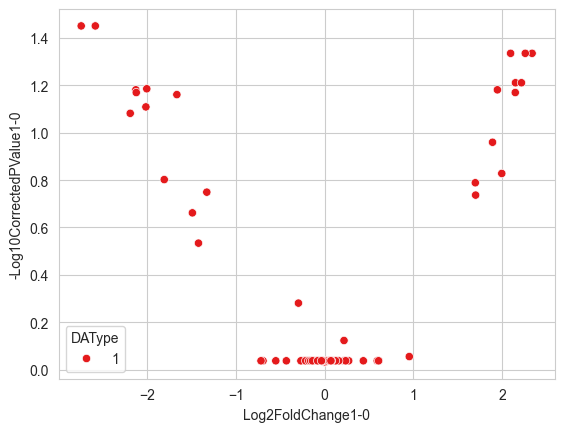

In [230]:
sns.scatterplot(
    data=da_df,
    x="Log2FoldChange1-0",
    y="-Log10CorrectedPValue1-0",
    hue="DAType",
    palette="Set1",
)

In [231]:
da_df

,Protein,DEScore1-0,Group1Mean,Group0Mean,Group1Stdev,Group0Stdev,Log2FoldChange1-0,PValue1-0,Group1RepCounts,Group0RepCounts,CorrectedPValue1-0,-Log10CorrectedPValue1-0,ProteinNum,DAType
0,Protein_1,0.067982,27.511239,27.683412,4.180425,4.498942,-0.172174,0.822564,50,100,0.918273,0.037028,1,1
1,Protein_2,0.099525,31.994635,32.240825,4.094675,3.956181,-0.246190,0.724805,50,100,0.918273,0.037028,2,1
2,Protein_3,0.179222,32.497636,32.061684,3.992884,4.078405,0.435952,0.537985,50,100,0.918273,0.037028,3,1
3,Protein_4,0.088446,28.446636,28.230580,3.353015,3.900391,0.216056,0.740008,50,100,0.918273,0.037028,4,1
4,Protein_5,0.808617,27.952577,29.759528,4.610616,4.781698,-1.806951,0.029869,50,100,0.157644,0.802323,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Protein_96,0.118991,29.833735,29.971041,1.040379,1.023895,-0.137306,0.445531,50,100,0.918273,0.037028,96,1
96,Protein_97,0.060140,29.945203,30.018433,0.995456,0.967558,-0.073230,0.667910,50,100,0.918273,0.037028,97,1
97,Protein_98,0.051587,30.169500,30.098551,1.155196,1.095356,0.070949,0.715854,50,100,0.918273,0.037028,98,1
98,Protein_99,0.061198,30.043133,30.122225,1.031212,1.064662,-0.079092,0.667461,50,100,0.918273,0.037028,99,1


In [232]:
quant_matrix.quantitative_data.X

array([[27.89413543, 24.50444712, 23.83544386, ..., 24.21072325,
        36.6556283 , 26.97290716],
       [36.90347927, 29.24942926, 34.23879221, ..., 36.38654131,
        32.4524279 , 27.60308325],
       [31.92145974, 28.86063058, 31.30968891, ..., 28.59522278,
        39.09068319, 27.49368598],
       ...,
       [28.29330352, 29.00420761, 27.78625998, ..., 28.22936705,
        29.37161563, 30.02708001],
       [31.68295931, 28.61462784, 32.20102331, ..., 28.38597761,
        28.62651277, 31.32338448],
       [30.89825118, 30.77157468, 29.28294325, ..., 27.35913243,
        30.35104263, 29.6608466 ]])

<Axes: xlabel='Log2FoldChange1-0', ylabel='Count'>

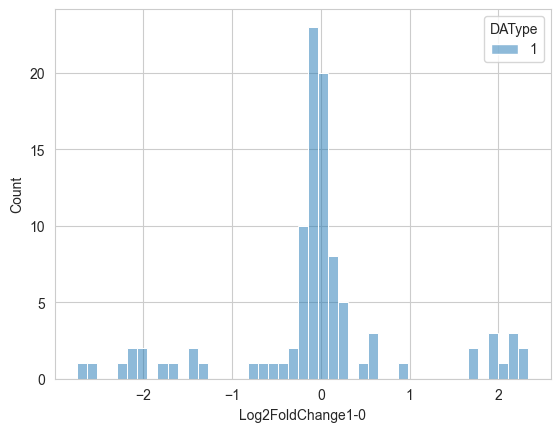

In [233]:
sns.histplot(
    data=da_df,
    x="Log2FoldChange1-0",
    hue="DAType",
)